In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"c:\Users\vishwas.balkundi\Downloads\MagicBricks.csv")

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


<Axes: xlabel='Type', ylabel='count'>

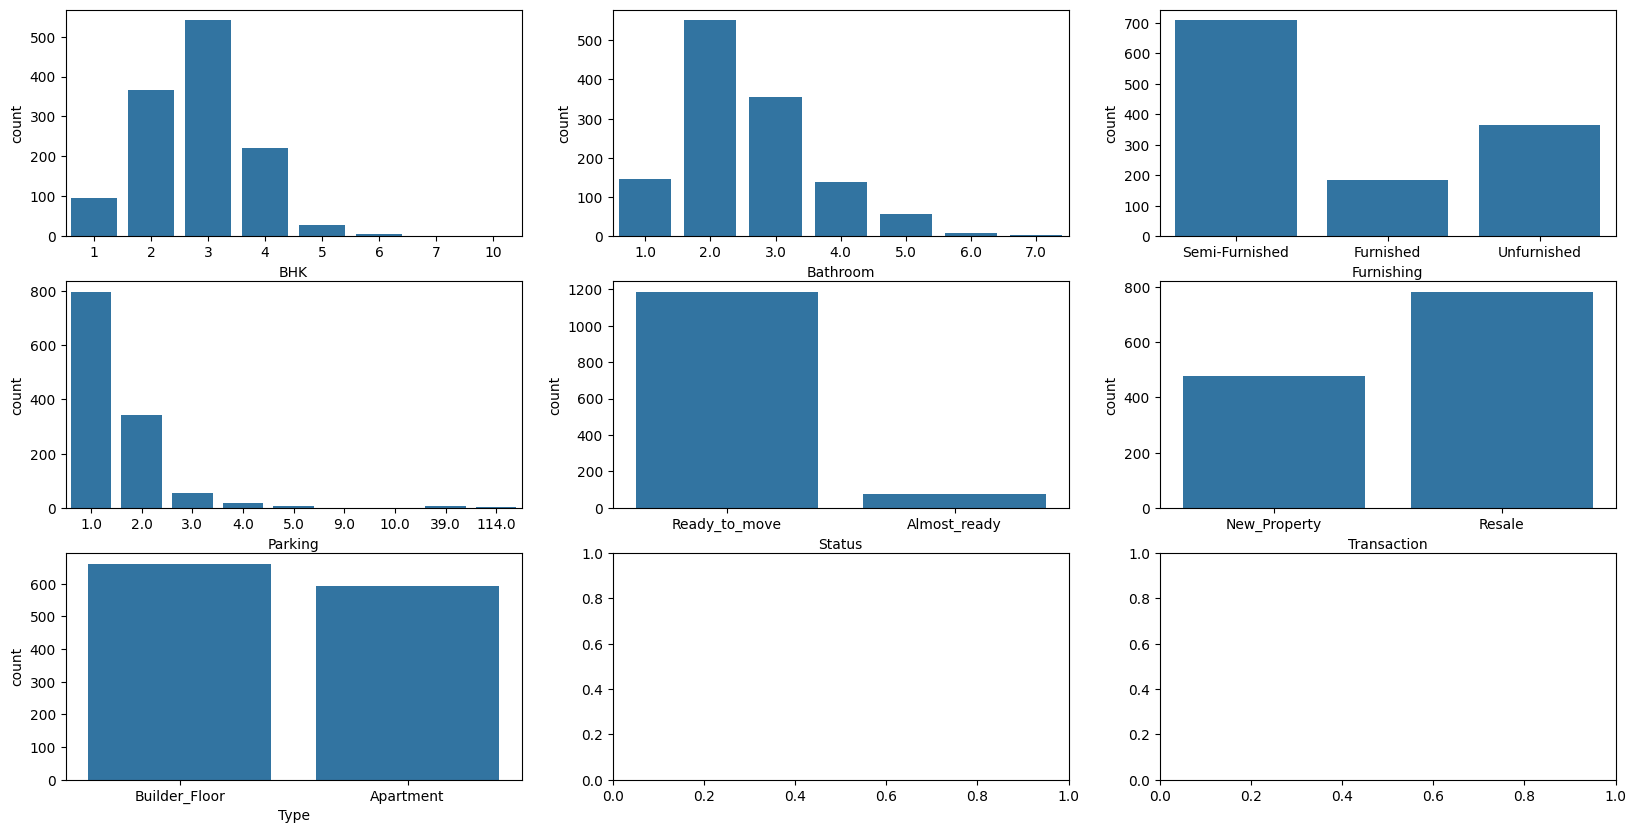

In [4]:
fig, ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x='BHK', data=df, ax=ax[0,0])
sns.countplot(x='Bathroom', data=df, ax=ax[0,1])
sns.countplot(x='Furnishing', data=df, ax=ax[0,2])
sns.countplot(x='Parking', data=df, ax=ax[1,0])
sns.countplot(x='Status', data=df, ax=ax[1,1])
sns.countplot(x='Transaction', data=df, ax=ax[1,2])
sns.countplot(x='Type', data=df, ax=ax[2,0])

In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [21]:
df_dropped = df.drop('Locality',axis=1)

In [22]:
df_dropped

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
# df_copy = df_dropped.copy()
    
    # Encode categorical column
categorical_column = ['Furnishing','Status','Transaction','Type']
numeric_features = ['Area','BHK','Bathroom','Parking','Per_Sqft']

categorical_columns = ['Furnishing', 'Status', 'Transaction', 'Type']

# Create label encoder
le = LabelEncoder()
for column in categorical_column:
    # Get non-null mask for current column
    non_null_mask = df_dropped[column].notna()
    
    # Encode non-null values
    df_dropped.loc[non_null_mask, column] = le.fit_transform(df_dropped.loc[non_null_mask, column])
# df_dropped
# Scale numeric features


# # Train KMeans on complete data
# kmeans = KMeans(n_clusters=5, random_state=42)
# kmeans.fit(complete_data)

# # Get cluster assignments for complete data
# complete_clusters = kmeans.predict(complete_data)

# # Predict clusters for rows with missing values
# missing_clusters = kmeans.predict(missing_data)

In [42]:
df_scaled = df_dropped.copy()
scalers = {}
for column in numeric_features:
            # Get non-null values
    non_null_mask = df_scaled[column].notna()
    scaler = StandardScaler()
    non_null_values = df_scaled.loc[non_null_mask, column].values.reshape(-1, 1)
    scaler.fit(non_null_values)

    # Store scaler for this column
    scalers[column] = scaler

    # Transform only non-null values
    df_scaled.loc[non_null_mask, column] = scaler.transform(non_null_values).ravel()
     
        

C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_14296\3442466948.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.21313022 -0.83503753 -0.83503753 ...  0.21313022 -0.83503753
  0.21313022]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[non_null_mask, column] = scaler.transform(non_null_values).ravel()


In [43]:
df_scaled

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.425188,0.213130,-0.533771,1,-0.149054,6500000,1,0,1,NaN
1,-0.457087,-0.835038,-0.533771,1,-0.149054,5000000,1,0,0,-0.427144
2,-0.329490,-0.835038,-0.533771,0,-0.149054,15500000,1,1,0,-0.427144
3,-0.552785,-0.835038,-0.533771,1,-0.149054,4200000,1,1,1,-0.427144
4,-0.520886,-0.835038,-0.533771,1,-0.149054,6200000,1,0,1,-0.427144
...,...,...,...,...,...,...,...,...,...,...
1254,1.691650,1.261298,2.345845,2,0.169587,55000000,1,0,1,-0.131324
1255,-0.265691,0.213130,-0.533771,1,0.169587,12500000,1,1,1,-0.131324
1256,-0.377339,0.213130,0.426101,1,0.169587,17500000,1,0,1,-0.131324
1257,-0.303970,-0.835038,-0.533771,2,-0.149054,11500000,1,1,1,-0.131324


In [41]:
df_scaled

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.425188,0.213130,-0.533771,1,-0.149054,6500000,1,0,1,NaN
1,-0.457087,-0.835038,-0.533771,1,-0.149054,5000000,1,0,0,-0.427144
2,-0.329490,-0.835038,-0.533771,0,-0.149054,15500000,1,1,0,-0.427144
3,-0.552785,-0.835038,-0.533771,1,-0.149054,4200000,1,1,1,-0.427144
4,-0.520886,-0.835038,-0.533771,1,-0.149054,6200000,1,0,1,-0.427144
...,...,...,...,...,...,...,...,...,...,...
1254,1.691650,1.261298,2.345845,2,0.169587,55000000,1,0,1,-0.131324
1255,-0.265691,0.213130,-0.533771,1,0.169587,12500000,1,1,1,-0.131324
1256,-0.377339,0.213130,0.426101,1,0.169587,17500000,1,0,1,-0.131324
1257,-0.303970,-0.835038,-0.533771,2,-0.149054,11500000,1,1,1,-0.131324


In [46]:
df_scaled.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [45]:
df_dropped.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [ ]:
df_dropped

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.425188,0.213130,-0.534196,1,-0.151047,-0.578591,1,0,1,-9.576034e-17
1,-0.457087,-0.835038,-0.534196,1,-0.151047,-0.637205,1,0,0,-4.750212e-01
2,-0.329490,-0.835038,-0.534196,0,-0.151047,-0.226904,1,1,0,-4.750212e-01
3,-0.552785,-0.835038,-0.534196,1,-0.151047,-0.668466,1,1,1,-4.750212e-01
4,-0.520886,-0.835038,-0.534196,1,-0.151047,-0.590313,1,0,1,-4.750212e-01
...,...,...,...,...,...,...,...,...,...,...
1254,1.691650,1.261298,2.347710,2,0.171854,1.316608,1,0,1,-1.460439e-01
1255,-0.265691,0.213130,-0.534196,1,0.171854,-0.344133,1,1,1,-1.460439e-01
1256,-0.377339,0.213130,0.426440,1,0.171854,-0.148752,1,0,1,-1.460439e-01
1257,-0.303970,-0.835038,-0.534196,2,-0.151047,-0.383209,1,1,1,-1.460439e-01


In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_array = imputer.fit_transform(df_scaled)
imputed_array = pd.DataFrame(imputed_array, columns=df_scaled.columns, index=df_scaled.index)

In [49]:
df['Price']

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1254    55000000
1255    12500000
1256    17500000
1257    11500000
1258    18500000
Name: Price, Length: 1259, dtype: int64

In [55]:
conc_df = pd.concat([imputed_array, df['Price']], axis=1)

In [56]:
conc_df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
Price          0
dtype: int64

<Axes: >

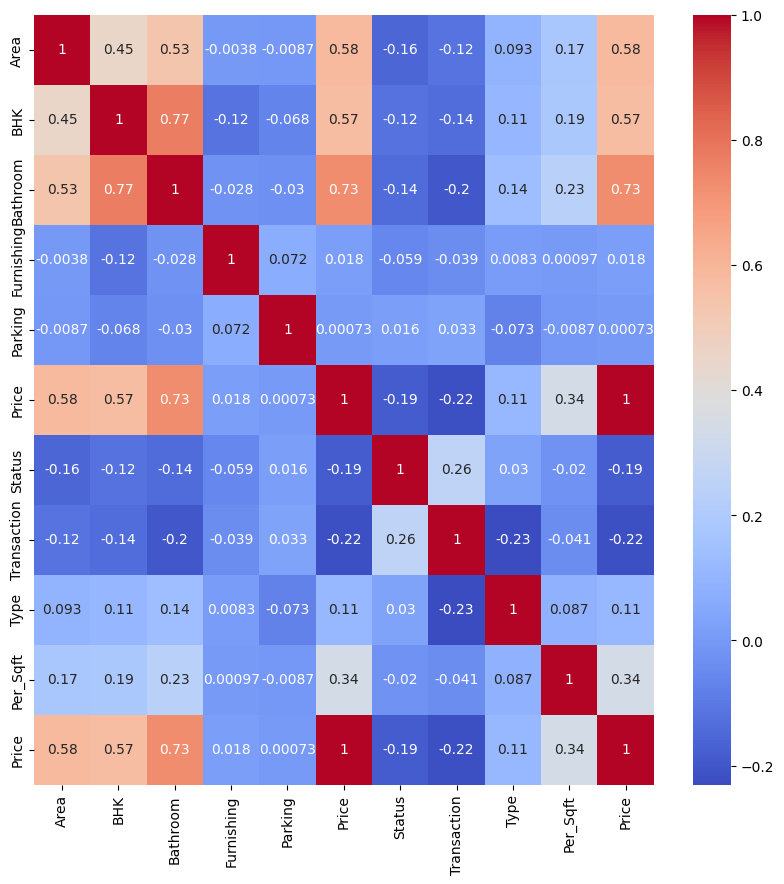

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(conc_df.corr(), annot=True, cmap='coolwarm')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(conc_df.drop('Price', axis = 1), df['Price'], test_size = 0.2, random_state = 42)

In [68]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [ ]:
df.fillna(df.mean(), inplace=True)

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
dtr.score(X_train, y_train)

0.9998150009621952

In [62]:
y_pred = dtr.predict(X_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7562619117087936
Mean Squared Error:  184324567857142.84
Mean Absolute Error:  6928928.571428572
Root Mean Squared Error:  13576618.424966611


In [66]:
df['Price'].mean()

21306703.733121525

In [67]:
pow(6928928.571428572,2)/21306703.733121525

0.32519946108123093

In [70]:
df = pd.read_csv(r"c:\Users\vishwas.balkundi\Downloads\MagicBricks.csv")

In [71]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [53]:
categorical_column = ['Furnishing','Status','Transaction','Type','Locality']
numeric_features = ['Area','BHK','Bathroom','Parking','Per_Sqft']

In [54]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [55]:
df.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [56]:
for column in numeric_features:
    df[column] = df[column].fillna(value=df[column].mean())

In [57]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [58]:
for column in categorical_column:
    df[column] = df[column].fillna(value=df[column].mode()[0])

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in categorical_column:
    df[column] = le.fit_transform(df[column])

In [65]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,7,1.0,6500000,1,0,1,8125.0
1,750.0,2,2.0,1,7,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,7,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,7,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,7,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,1,4,1.0,16500000,1,1,1,12916.0
1254,4118.0,4,5.0,2,4,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,4,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,4,3.0,17500000,1,0,1,12916.0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis = 1), df['Price'], test_size = 0.2, random_state = 42)

In [63]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df[numeric_features]))
df = df[(z < 3).all(axis=1)]

In [66]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,7,1.0,6500000,1,0,1,8125.0
1,750.0,2,2.0,1,7,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,7,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,7,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,7,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,1,4,1.0,16500000,1,1,1,12916.0
1254,4118.0,4,5.0,2,4,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,4,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,4,3.0,17500000,1,0,1,12916.0


In [67]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\base.py", line 666, in _val

In [69]:
dtr = DecisionTreeRegressor( max_depth=6, min_samples_leaf = 1, min_samples_split = 8, random_state=42)
dtr.fit(X_train, y_train)
d_pred = dtr.predict(X_test)
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.7312074459350943
Mean Squared Error:  92843538318801.08
Mean Absolute Error:  4871298.201694887
Root Mean Squared Error:  9635535.185904365


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.662336258838582
Mean Squared Error:  116632310000000.0
Mean Absolute Error:  5211166.666666667
Root Mean Squared Error:  10799643.97561327


In [92]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7669939831400074
Mean Squared Error:  176208542813051.16
Mean Absolute Error:  6775780.423280423
Root Mean Squared Error:  13274356.587535651


In [90]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,1.0,6500000,1,0,1,15690.136542
1,750.0,2,2.0,1,1.0,5000000,1,0,0,6667.000000
2,950.0,2,2.0,0,1.0,15500000,1,1,0,6667.000000
3,600.0,2,2.0,1,1.0,4200000,1,1,1,6667.000000
4,650.0,2,2.0,1,1.0,6200000,1,0,1,6667.000000
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,3.0,55000000,1,0,1,12916.000000
1255,1050.0,3,2.0,1,3.0,12500000,1,1,1,12916.000000
1256,875.0,3,3.0,1,3.0,17500000,1,0,1,12916.000000
1257,990.0,2,2.0,2,1.0,11500000,1,1,1,12916.000000


In [80]:
categorical_column

['Furnishing', 'Status', 'Transaction', 'Type']

In [84]:
df['Furnishing'].mode()

pandas.core.series.Series